## Observations and Insights 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mousemd_path = "data/Mouse_metadata.csv"
stresults_path = "data/Study_results.csv"

# Read the mouse data and the study results
mousedata = pd.read_csv(mousemd_path)
stresults = pd.read_csv(stresults_path)

# Combine the data into a single dataset
combineddata = pd.merge(mousedata, stresults, how = "left", on = "Mouse ID")

# Display the data table for preview
combineddata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [106]:
# Checking the number of mice.
micenumber = len(combineddata["Mouse ID"].unique())
print(f"Number of mice in this study: {micenumber}")

Number of mice in this study: 249


In [107]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = combineddata.loc[combineddata.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
print(f"Duplicate Mice ID: {duplicatemice}")

# Optional: Get all the data for the duplicate mouse ID.
duplicatemiceall = combineddata[combineddata.duplicated(["Mouse ID", "Timepoint"])]
duplicatemiceall

Duplicate Mice ID: ['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [108]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
alldata = combineddata.drop_duplicates(subset=["Mouse ID", "Timepoint"])
alldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Checking the number of mice in the clean DataFrame and showing new index after resetting it.
micenumber = len(alldata["Mouse ID"].unique())
print(f"Number of mice in the clean dataframe: {micenumber}")


Number of mice in the clean dataframe: 249


## Summary Statistics

In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
data_mean = alldata.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
data_mean

data_median = alldata.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
data_median

data_variance = alldata.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
data_variance

data_std= alldata.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
data_std

data_sem = alldata.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
data_sem

# Assemble the resulting series into a single summary dataframe.
statistics1 = pd.DataFrame({"Mean": data_mean, "Median":data_median, "Variance":data_variance, 
                               "Standard Deviation": data_std, "SEM": data_sem})
statistics1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
statistics2 = alldata.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
statistics2 = statistics2.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})



## Bar and Pie Charts

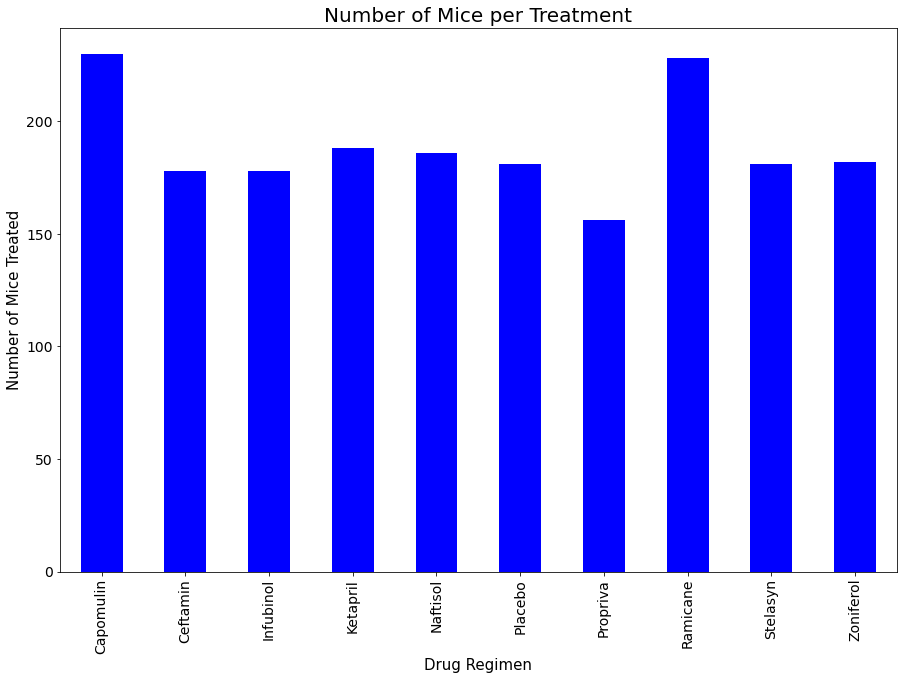

In [112]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
druggedmice = alldata.groupby(["Drug Regimen"]).count()["Mouse ID"]

plotusingpandas = druggedmice.plot(kind="bar", color='b', figsize=(15,10), fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)

plt.show()



[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

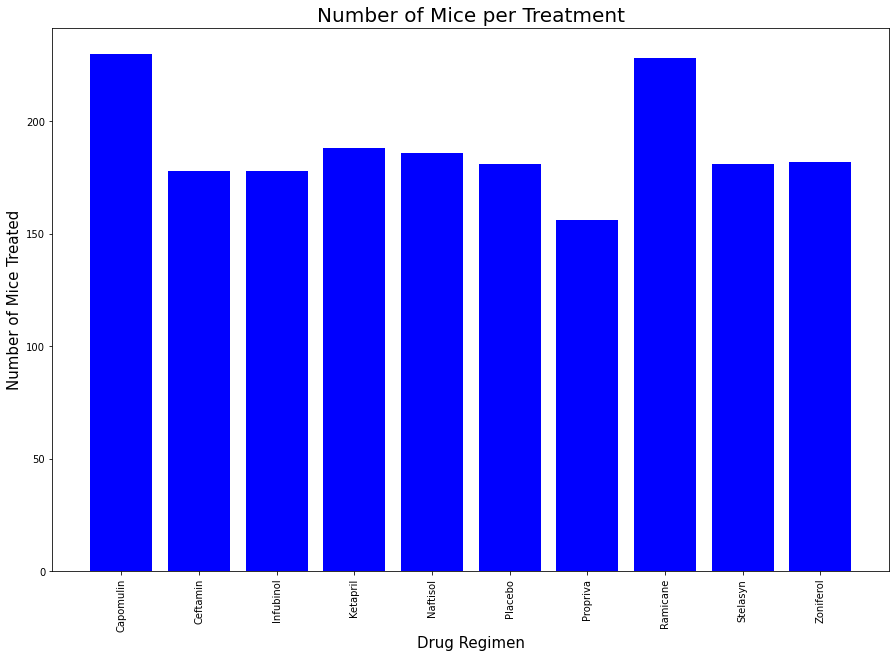

In [113]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
micetreatment = (alldata.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
micetreatment

x_axis = np.arange(len(druggedmice))
tick_locations = [value+0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.xticks(tick_locations, druggedmice.index.values, rotation="vertical")
plt.bar(x_axis, micetreatment, color='b', alpha=1, align="edge")
plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 15)
plt.ylabel("Number of Mice Treated",fontsize = 15)


micetreatment



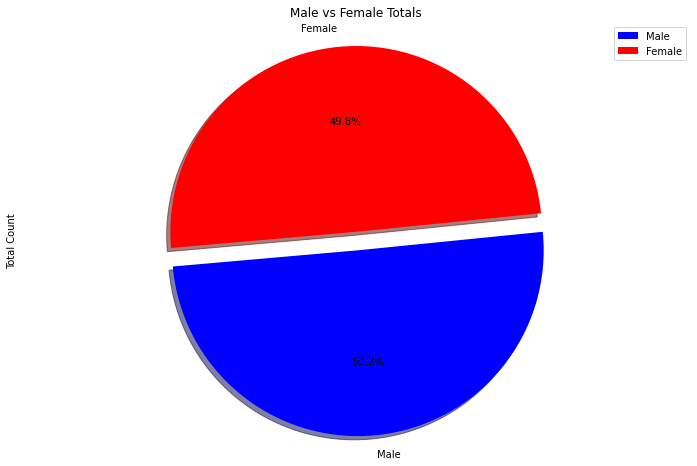

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandagender = alldata.loc[:, ["Sex", "Mouse ID"]]
pandagender = pandagender.drop_duplicates()
pandacount = pandagender["Sex"].value_counts()

# Creating Dataframe
datagender = pd.DataFrame({"Total Count": pandacount})

# Pieplot formula showing distribution of Male vs Female mice
colors = ["blue", "red"]
explode = (0.1, 0)
genderpie = datagender.plot(kind="pie", figsize=(12,8), colors=colors, y="Total Count", title="Male vs Female Totals", 
                                            startangle=185, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.show()


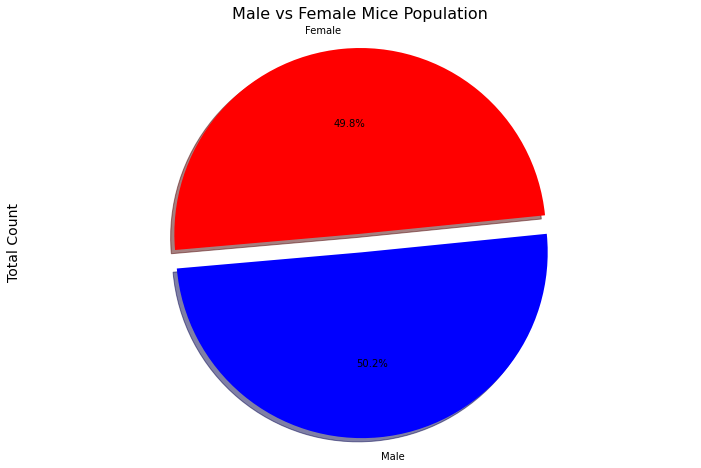

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplotgender = alldata.loc[:, ["Sex", "Mouse ID"]]
pyplotgender = pyplotgender.drop_duplicates()
pyplotcount = pyplotgender["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "red"]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Male vs Female Mice Population",fontsize = 16)
plt.ylabel("Total Count",fontsize = 14)
plt.pie(pyplotcount, labels=labels, colors=colors, startangle=185, explode=explode, shadow=True, autopct="%1.1f%%")

#Set equal axis
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatesttp = alldata.groupby(["Mouse ID"])["Timepoint"].max()
greatesttp = greatesttp.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mergedmicedata = greatesttp.merge(alldata, on=["Mouse ID", "Timepoint"], how="left")
mergedmicedata


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [117]:
# List of different treatments for tumors
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating tumor volume data empty list
totaltumors = []

# Finding the IQR and determining potential outliers 
for drug in treatments:
    
    # Finding the rows which have the mice on each drug and gather the tumor volumes
    tumor = mergedmicedata.loc[mergedmicedata["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Created subset 
    totaltumors.append(tumor)

    # Creating outliers
    quartiles = tumor.quantile([.25, .5, .75])
    lowest = quartiles[.25]
    highest = quartiles[.75]
    iqr = highest - lowest

    lowerpar = lowest - (1.5*iqr)
    higherpar = highest + (1.5*iqr)
    outliers = tumor.loc[(tumor < lowerpar) | (tumor > higherpar)]
    print(f"For {drug}, the outliers are: {outliers}")



For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


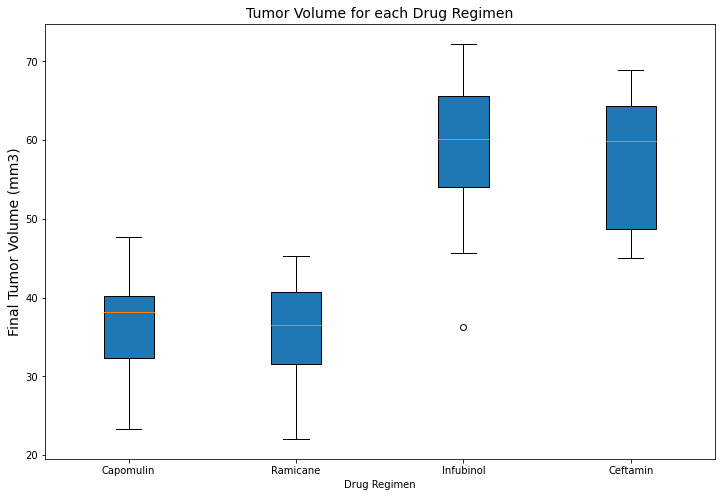

In [118]:
# Creating a box plot of the final tumor volume of each mouse across 4 different drugs used to treat the tumors
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =14)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(totaltumors, labels=treatments, widths = 0.3, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

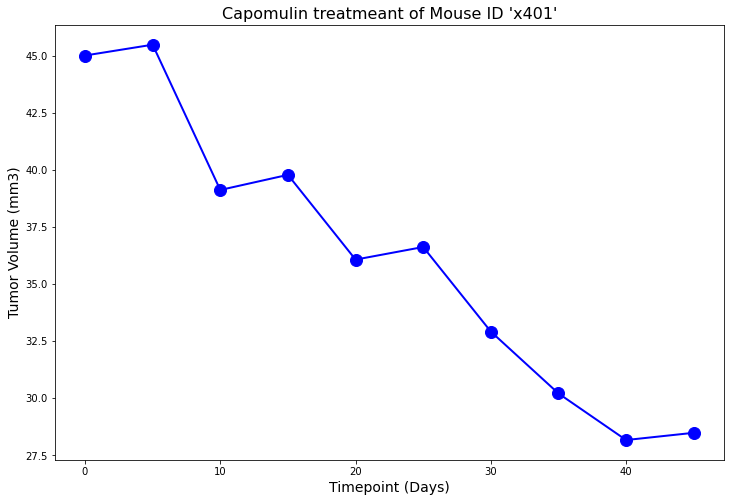

In [119]:
# Creating a line plot of tumor volume vs. time point for mouse ID 'x401' treated with Capomulin
capo_df = alldata.loc[alldata["Drug Regimen"] == "Capomulin",:]
capo_df

# Getting data for a specific mouse (e.g. Mouse ID = "x401")
moucecapo = capo_df.loc[capo_df["Mouse ID"] == "x401",:]
moucecapo

# Plot blueprint directions
x_axis = moucecapo["Timepoint"]
tumorv = moucecapo["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Capomulin treatmeant of Mouse ID 'x401'",fontsize = 16)
plt.plot(x_axis, tumorv,linewidth= 2, markersize= 12,marker="o",color="blue", label="mm3")
plt.xlabel("Timepoint (Days)",fontsize = 14)
plt.ylabel("Tumor Volume (mm3)",fontsize = 14)

plt.show()


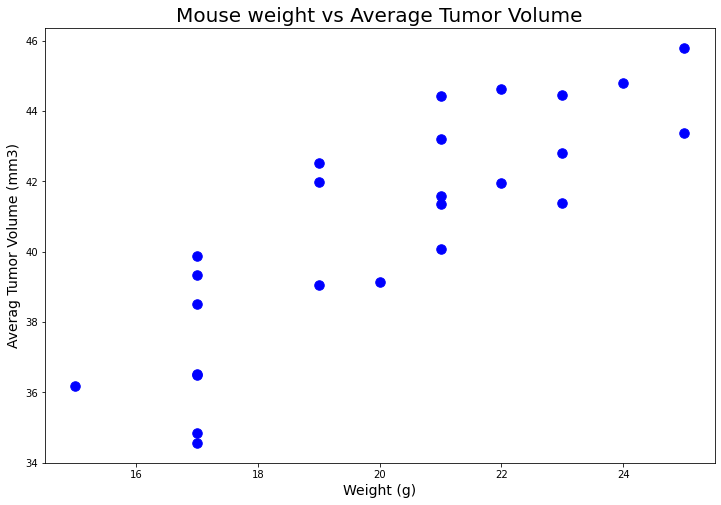

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capoavg_df = capo_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(12, 8))
marker_size=14
plt.scatter(capoavg_df['Weight (g)'],capoavg_df['Tumor Volume (mm3)'],s=90, color="blue")
plt.title("Mouse weight vs Average Tumor Volume",fontsize =20)
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Averag Tumor Volume (mm3)",fontsize =14)

plt.show()

capoavg_df.head()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
y = 0.95x + 21.55


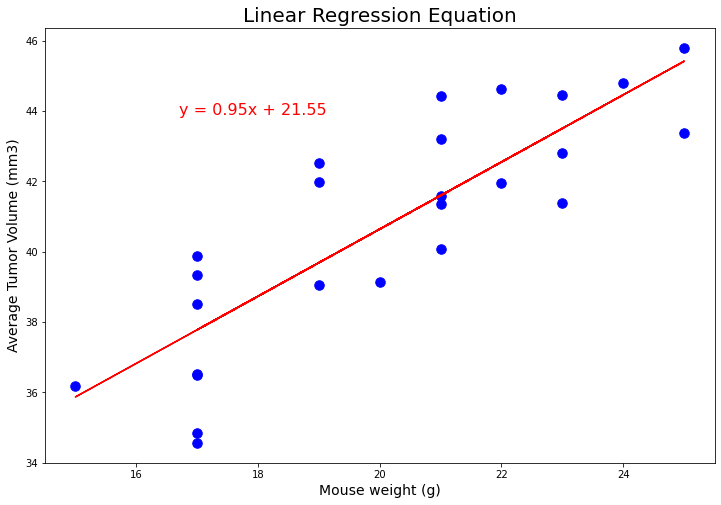

In [121]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capoavg_df['Weight (g)'],capoavg_df['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

x_values = capoavg_df['Weight (g)']
y_values = capoavg_df['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values, s=90, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Equation", fontsize=20)
plt.xlabel("Mouse weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=16,color="red")

plt.show()

